In [19]:
from runs import Run, Snapshot, get_runs_in_dir
import tabulate
import os
from IPython.display import Markdown as md

import matplotlib.pyplot as plt
import matplotlib
import shutil
import jinja2
from tqdm.notebook import trange, tqdm

# Build an archive of the various runs & snapshots

This notebook can be used to generate a printable html archive, of all runs and their snapshots.

## Configuration

In [2]:

outdir = os.path.abspath('out/html')

## Output Run Index

In [3]:
palette = ["#c99ae0",
"#6bd154",
"#bb79f1",
"#c2d436",
"#ec68d3",
"#82d086",
"#e87fb7",
"#4dd7c4",
"#c7ba5c",
"#64a6e7"]

In [4]:
#see also https://github.com/matplotlib/matplotlib/blob/f6e0ee49c598f59c6e6cf4eefe473e4dc634a58a/lib/matplotlib/_cm.py#L859
palette = matplotlib.cm.datad['Accent']['listed']
palette = matplotlib.cm.datad['Set3']['listed']

In [5]:
def get_rgb_for_idx(i):
    return f"rgb({palette[i][0]*255}, {palette[i][1]*255},{palette[i][2]*255})"

In [1]:
%run ThisPlaceDoesExist.ipynb

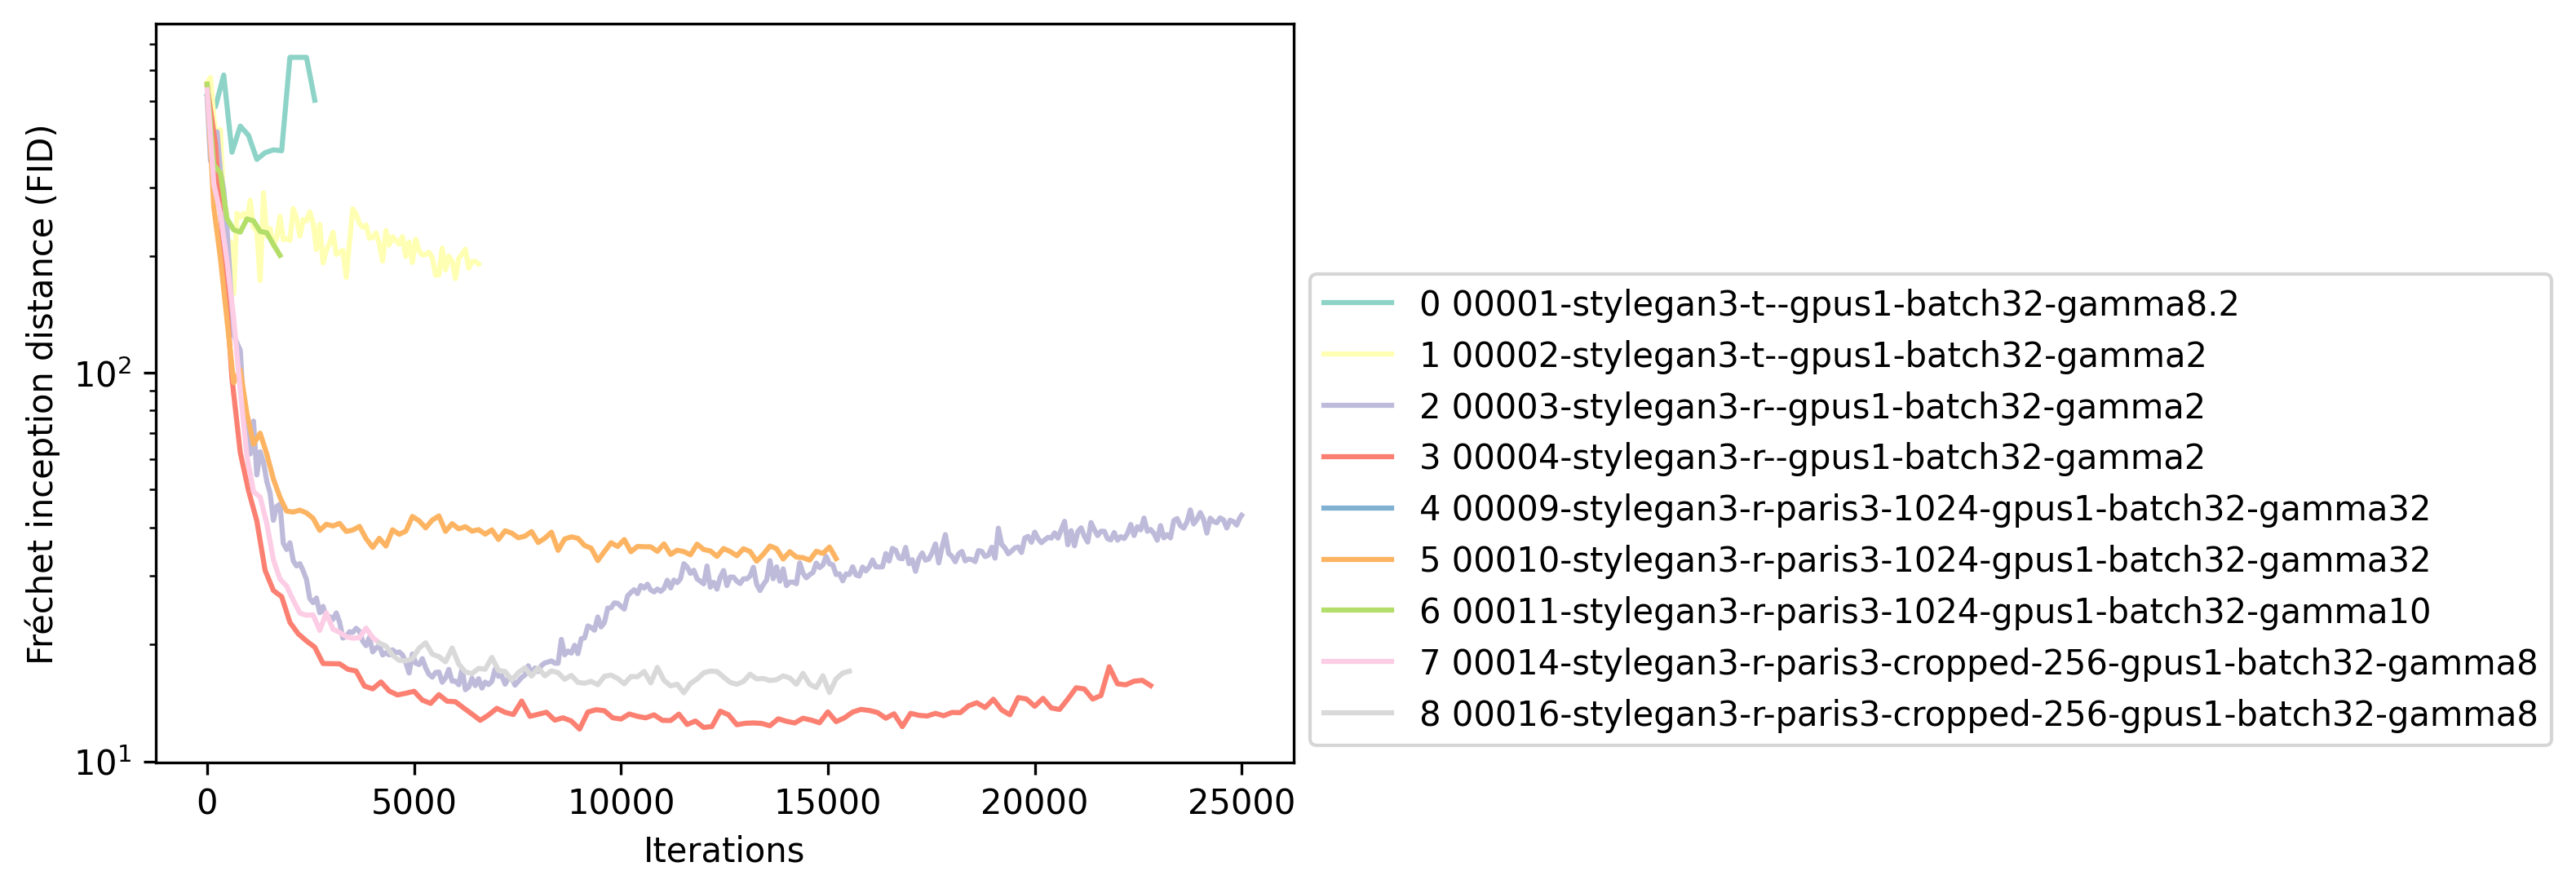

In [8]:
%matplotlib inline

plot = plot_runs(runs, dpi=300, palette=palette)
plot.legend(bbox_to_anchor=(1,0), loc="lower left")
# plot.show()

plt.xlabel('Iterations')
plt.ylabel('Fréchet inception distance (FID)')
plt.savefig(os.path.join(outdir, 'runs.png'), bbox_inches='tight', transparent=True)

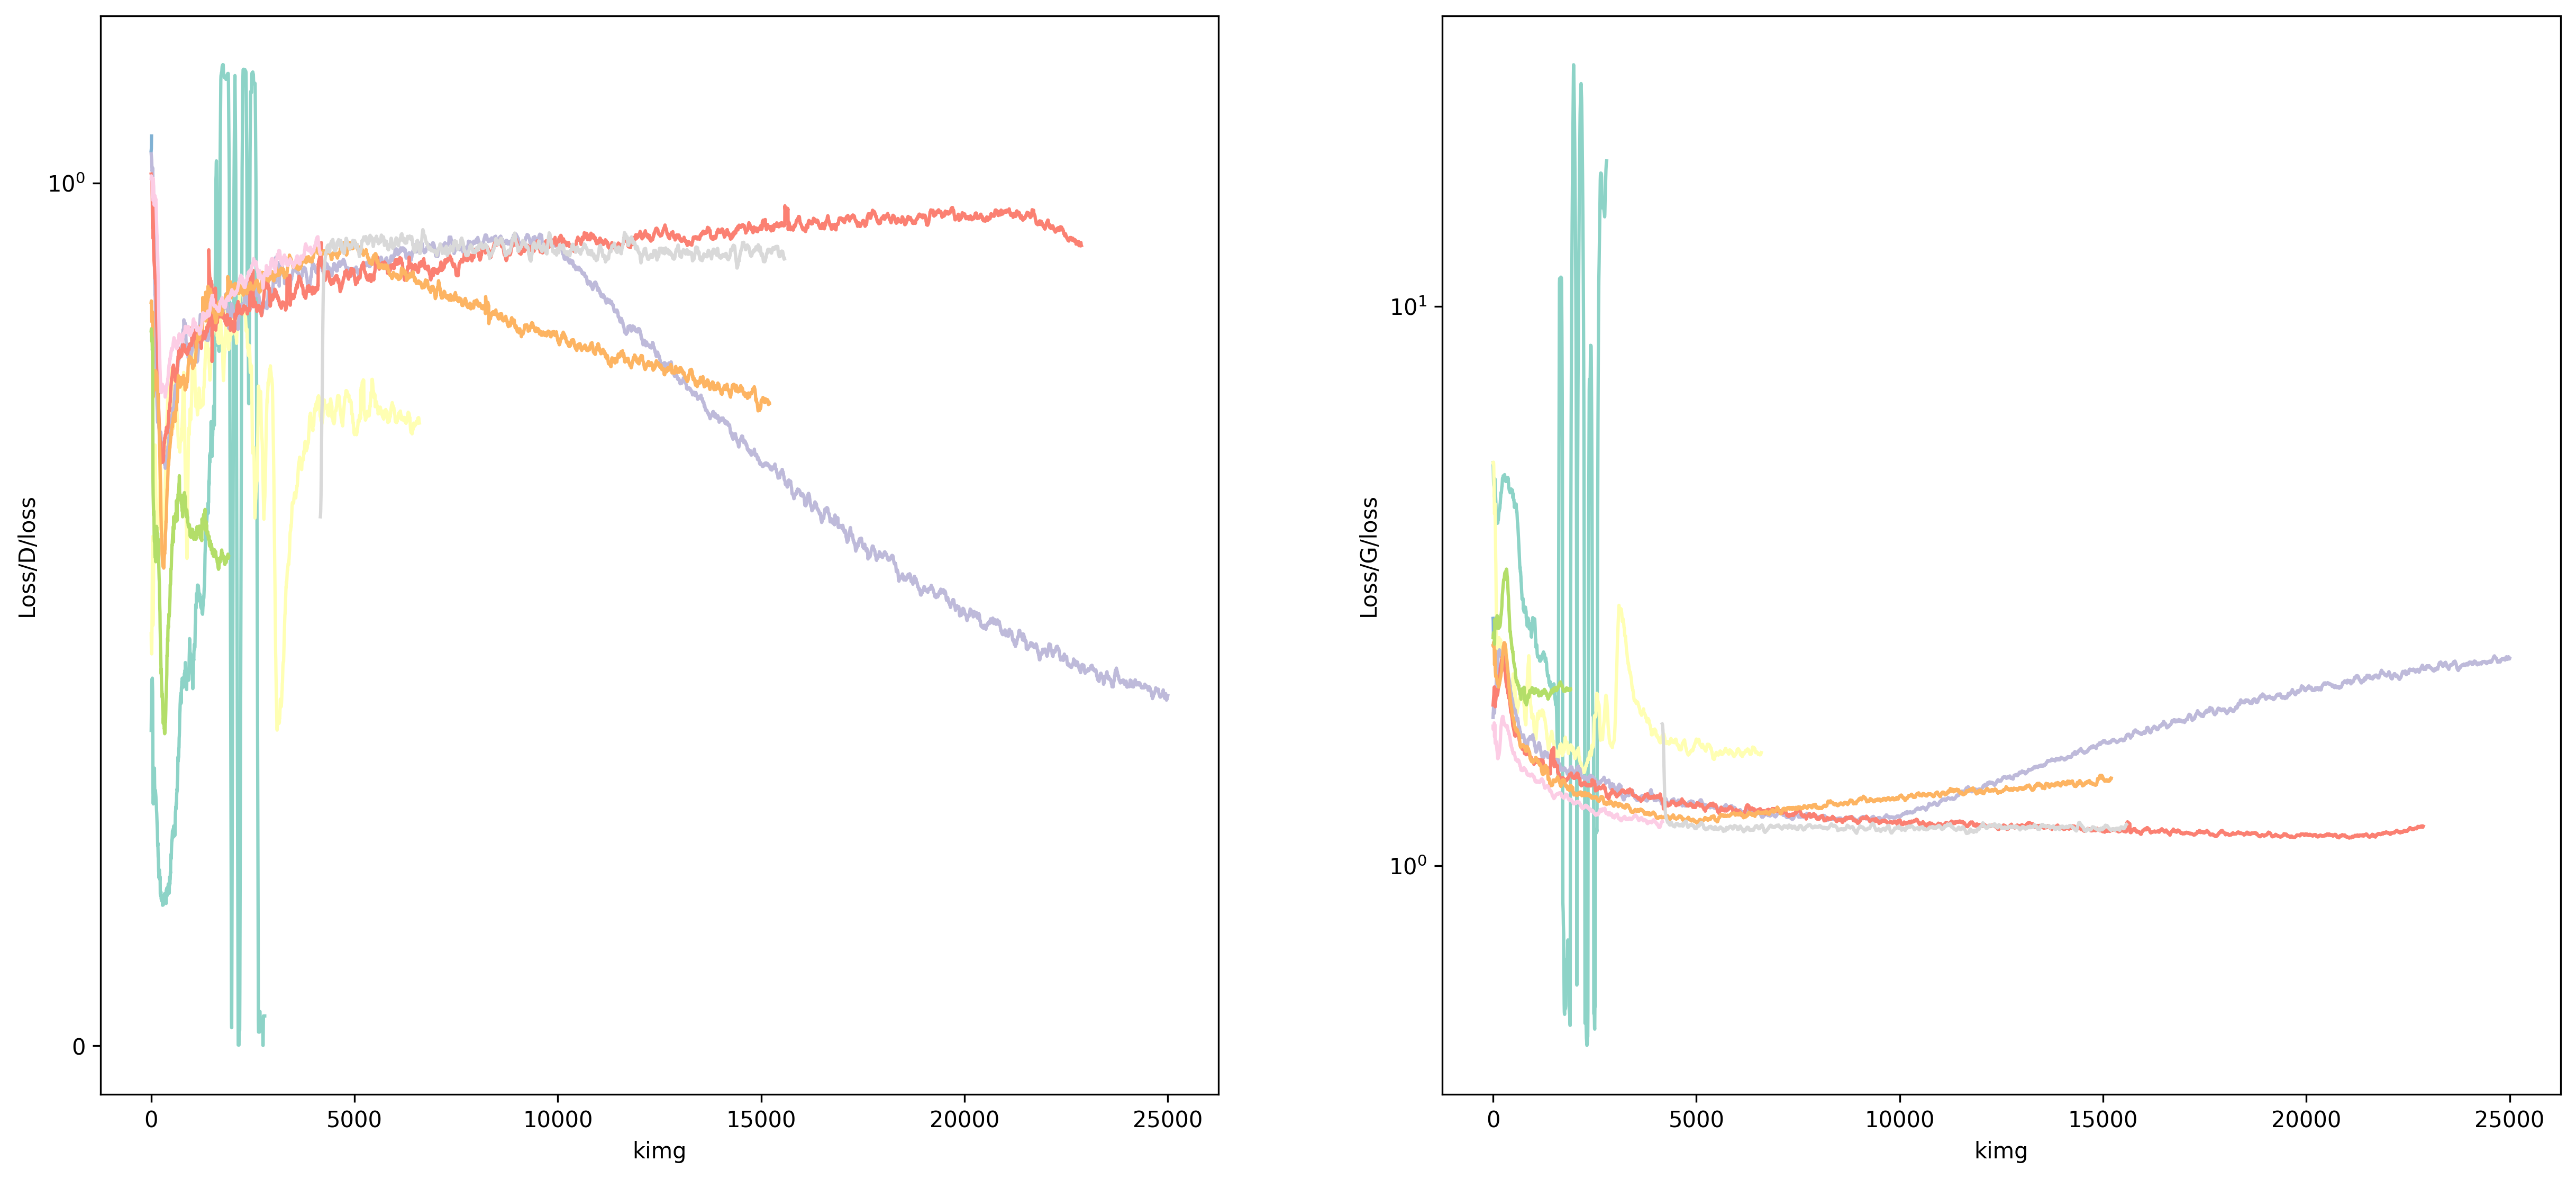

In [26]:
plot = plot_stats([
    'Loss/D/loss',
    'Loss/G/loss',
], runs, palette=palette)
# plot.legend()
plt.savefig(os.path.join(outdir, 'run_losses.png'), bbox_inches='tight', transparent=True)

In [10]:
index_html = tabulate.tabulate([
        {
         #   "idx": i,
         # "conditional": run.dataset_is_conditional(),
         **run.get_summary(),
         "nr": f"<a href='#run{run.as_nr}'>{run.as_nr}</a>",
            
         "page": f"<span class='tocitem' style='color:{get_rgb_for_idx(i)}' data-ref='#run{run.as_nr}'>&#129926;</span>",
            
        } for i, run in enumerate(runs)
    ], tablefmt='unsafehtml', headers="keys", colalign=("left","left")
)

In [11]:
index_html

'<table>\n<thead>\n<tr><th>nr                           </th><th>dataset           </th><th>conditional  </th><th style="text-align: right;">  resolution</th><th style="text-align: right;">  gamma</th><th>duration         </th><th style="text-align: right;">  iterations</th><th style="text-align: right;">  last_fid</th><th>page                                                                                             </th></tr>\n</thead>\n<tbody>\n<tr><td><a href=\'#run00001\'>00001</a></td><td>paris3            </td><td>True         </td><td style="text-align: right;">         256</td><td style="text-align: right;">    8.2</td><td>3 days, 10:34:26 </td><td style="text-align: right;">        2600</td><td style="text-align: right;">  502.277 </td><td><span class=\'tocitem\' style=\'color:rgb(141.0, 211.0,199.0)\' data-ref=\'#run00001\'>&#129926;</span></td></tr>\n<tr><td><a href=\'#run00002\'>00002</a></td><td>paris3            </td><td>True         </td><td style="text-align: right;">         256</td><td style="text-align: right;">    2  </td><td>5 days, 3:43:08  </td><td style="text-align: right;">        6560</td><td style="text-align: right;">  190.346 </td><td><span class=\'tocitem\' style=\'color:rgb(255.0, 255.0,179.0)\' data-ref=\'#run00002\'>&#129926;</span></td></tr>\n<tr><td><a href=\'#run00003\'>00003</a></td><td>paris3            </td><td>True         </td><td style="text-align: right;">         256</td><td style="text-align: right;">    2  </td><td>18 days, 13:01:50</td><td style="text-align: right;">       25000</td><td style="text-align: right;">   42.9661</td><td><span class=\'tocitem\' style=\'color:rgb(190.0, 186.0,218.0)\' data-ref=\'#run00003\'>&#129926;</span></td></tr>\n<tr><td><a href=\'#run00004\'>00004</a></td><td>paris3            </td><td>False        </td><td style="text-align: right;">         256</td><td style="text-align: right;">    2  </td><td>15 days, 16:13:20</td><td style="text-align: right;">       22800</td><td style="text-align: right;">   15.6691</td><td><span class=\'tocitem\' style=\'color:rgb(251.0, 128.0,114.0)\' data-ref=\'#run00004\'>&#129926;</span></td></tr>\n<tr><td><a href=\'#run00009\'>00009</a></td><td>paris3-1024.zip   </td><td>False        </td><td style="text-align: right;">        1024</td><td style="text-align: right;">   32  </td><td>0:00:00          </td><td style="text-align: right;">           0</td><td style="text-align: right;">  549.99  </td><td><span class=\'tocitem\' style=\'color:rgb(128.0, 177.0,211.0)\' data-ref=\'#run00009\'>&#129926;</span></td></tr>\n<tr><td><a href=\'#run00010\'>00010</a></td><td>paris3-1024.zip   </td><td>False        </td><td style="text-align: right;">        1024</td><td style="text-align: right;">   32  </td><td>50 days, 3:15:24 </td><td style="text-align: right;">       15200</td><td style="text-align: right;">   33.2466</td><td><span class=\'tocitem\' style=\'color:rgb(253.0, 180.0,98.0)\' data-ref=\'#run00010\'>&#129926;</span> </td></tr>\n<tr><td><a href=\'#run00011\'>00011</a></td><td>paris3-1024.zip   </td><td>False        </td><td style="text-align: right;">        1024</td><td style="text-align: right;">   10  </td><td>5 days, 18:48:04 </td><td style="text-align: right;">        1760</td><td style="text-align: right;">  200.356 </td><td><span class=\'tocitem\' style=\'color:rgb(179.0, 222.0,105.0)\' data-ref=\'#run00011\'>&#129926;</span></td></tr>\n<tr><td><a href=\'#run00014\'>00014</a></td><td>paris3-cropped-256</td><td>False        </td><td style="text-align: right;">         256</td><td style="text-align: right;">    8  </td><td>2 days, 20:08:22 </td><td style="text-align: right;">        4160</td><td style="text-align: right;">   20.1699</td><td><span class=\'tocitem\' style=\'color:rgb(252.0, 205.0,229.0)\' data-ref=\'#run00014\'>&#129926;</span></td></tr>\n<tr><td><a href=\'#run00016\'>00016</a></td><td>paris3-cropped-256</td><td>False        </td><td style="text-align: right;">         256</td><td style="text-align:

In [12]:
jinja_env = jinja2.Environment(
    loader=jinja2.FileSystemLoader("templates"),
    autoescape=jinja2.select_autoescape()
)



In [13]:
template = jinja_env.get_template("runs.j2")


In [21]:
template_vars = {
    "runs_graph": "runs.png",
    "runs_losses_graph": "run_losses.png",
    "runs_table": index_html,
    "runs": runs
}

In [23]:
with open(os.path.join(outdir, 'index.html'), 'w') as fp:
    fp.write(template.render(**template_vars))

In [24]:
[run.id for run in runs]

['00001-stylegan3-t--gpus1-batch32-gamma8.2',
 '00002-stylegan3-t--gpus1-batch32-gamma2',
 '00003-stylegan3-r--gpus1-batch32-gamma2',
 '00004-stylegan3-r--gpus1-batch32-gamma2',
 '00009-stylegan3-r-paris3-1024-gpus1-batch32-gamma32',
 '00010-stylegan3-r-paris3-1024-gpus1-batch32-gamma32',
 '00011-stylegan3-r-paris3-1024-gpus1-batch32-gamma10',
 '00014-stylegan3-r-paris3-cropped-256-gpus1-batch32-gamma8',
 '00016-stylegan3-r-paris3-cropped-256-gpus1-batch32-gamma8']

Copy necessary auxilary files to the output directory:

In [25]:
files = [
    "templates/style.css", 
    "templates/pagedjs-interface.css",
]
for src in files:
    shutil.copy(src, outdir)

In [20]:
for run in runs:
    nr = 7 if run.resolution > 512 else 8
    for snapshot in tqdm(run.snapshots):
        filename = os.path.join(outdir, 'imgs', snapshot.id + ".jpg")
        if not os.path.exists(filename):
            img = snapshot.get_preview_img(nr,1)
            img.save(filename)

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/314 [00:00<?, ?it/s]

  0%|          | 0/115 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/96 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]